<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
# Loading in dlpyr and data visualization libraries
library(dplyr)
library(ggplot2)
install.packages('gridExtra')
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [241]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/data/data_w_5_clusters.csv")
df$clusters <- as.factor(df$clusters)
# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columns from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 15 columns in the data.
---------------------------------------------------------------------------------------------------

  Age    Sex Cancer Coronary_heart_disease Depression Smoked_100_cig
1  64   Male    Yes                    Yes         No            Yes
2  37 Female     No                     No         No             No
3  72 Female     No                     No         No             No
4  84 Female     No                     No         No             No
5  31 Female     No                     No         No            Yes
6  81 Female    Yes                     No         No             No
     Education Region     Anxiety Height Weight Sleep_hours Aerobic.Strength
1         Bach  South Few times Y     74    235           8          Aerobic
2         Bach  South     Monthly     69    218           9          Aerobic
3 Some College  South       Never     64    240           8          Neither
4   Assoc Tech  South Few times Y     66    183           8

In [242]:
# Getting frequencies for each cluster
round(prop.table(table(df$clusters)) * 100,2)


    1     2     3     4     5 
 1.42 18.47 36.92 40.93  2.25 

Cluster 4 makes up ~ 40.93% of the data, Cluster 3 makes up 36.92% of the data, Cluster 2 makes up ~ 18.47% of the data, Cluster 5 makes up 2.25% of the data, and Cluster 1 makes up 1.42% of the data.

In [243]:
# Creating a vector for the numeric column names
num_cols <- c("Age", "Height", "Weight", "Sleep_hours", "Alcohol_drink_12m")

# Creating a vector for the categorical column names
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic.Strength')

## Grouped Summary Statistics

In [244]:
# Looping through the numeric columns
for (i in num_cols){
  # Calculating mean and standard deviation for each numeric column grouped by the clusters
  summary_df <- df %>%
    group_by(.data[['clusters']]) %>%
    summarize(mean = round(mean(.data[[i]]),2),
              sd = round(sd(.data[[i]]),2)
    )
    # Printing numerical feature name
    cat(i,'\n')
    # Printing the summary stats
    print(summary_df)
    # Printing separating line
    cat('-----------------------------------\n')
}

Age 
# A tibble: 5 × 3
  clusters  mean    sd
  <fct>    <dbl> <dbl>
1 1         52.3  18.6
2 2         48.4  17.1
3 3         53.9  17.4
4 4         52.2  17.2
5 5         53.4  16.3
-----------------------------------
Height 
# A tibble: 5 × 3
  clusters  mean    sd
  <fct>    <dbl> <dbl>
1 1         66.2  3.95
2 2         65.5  3.23
3 3         64.0  2.41
4 4         70.1  2.6 
5 5         67.1  3.74
-----------------------------------
Weight 
# A tibble: 5 × 3
  clusters  mean    sd
  <fct>    <dbl> <dbl>
1 1         182.  40.2
2 2         176.  38.8
3 3         158.  32.4
4 4         200.  35.1
5 5         187.  38.3
-----------------------------------
Sleep_hours 
# A tibble: 5 × 3
  clusters  mean    sd
  <fct>    <dbl> <dbl>
1 1         7.12  1.59
2 2         6.81  1.68
3 3         7.18  1.21
4 4         7.14  1.25
5 5         7.04  1.71
-----------------------------------
Alcohol_drink_12m 
# A tibble: 5 × 3
  clusters  mean    sd
  <fct>    <dbl> <dbl>
1 1         47.8  88.4


**Age**
* Cluster 3 seems to be the oldest, with an average age of 53.9 years.
* Cluster 2 seems to be the youngest, with an average age of 48.4 years.
* Cluster 1 has the largest standard deviation (18.6).
* Cluster 5 has the smallest standard deviation (16.3).

**Height**
* Cluster 4 seems to be the tallest, with an average height of 70.1 inches.
* Cluster 3 seems to be the shortest, with an average height of 64 inches.
* Cluster 1 has the largest standard deviation (3.95).
* Cluster 3 has the smallest standard deviation (2.41).

**Weight**
* Cluster 4 seems to be the heaviest, with an average weight of 200 pounds.
* Cluster 3 seems to be the lightest, with an average weight of 158 pounds.
* Cluster 1 has the largest standard deviation (40.2).
* Cluster 3 has the smallest standard deviation (32.4).

**Sleep_hours**
* Cluster 3 seems to sleep the longest, with an average of 7.18 hours of sleep per night.
* Cluster 2 seems to sleep the shortest, with an average of 6.81 hours of sleep per night.
* Cluster 5 has the largest standard deviation (1.71).
* Cluster 3 has the smallest standard deviation (1.21).

**Alcohol_drink_12m**
* Cluster 4 seems to have drank the most days, with an average of 84.9 days.
* Cluster 1 seems to have drank the fewest days, with an average of 47.8 days.
* Cluster 4 has the largest standard deviation (107).
* Cluster 3 has the smallest standard deviation (86.3).

One thing that stands out is that Cluster 4 had the highest average number of days drinking alcohol (84.9), and also had the highest average weight (200 lbs) and height (70.1 inches).

## Grouped Boxplots

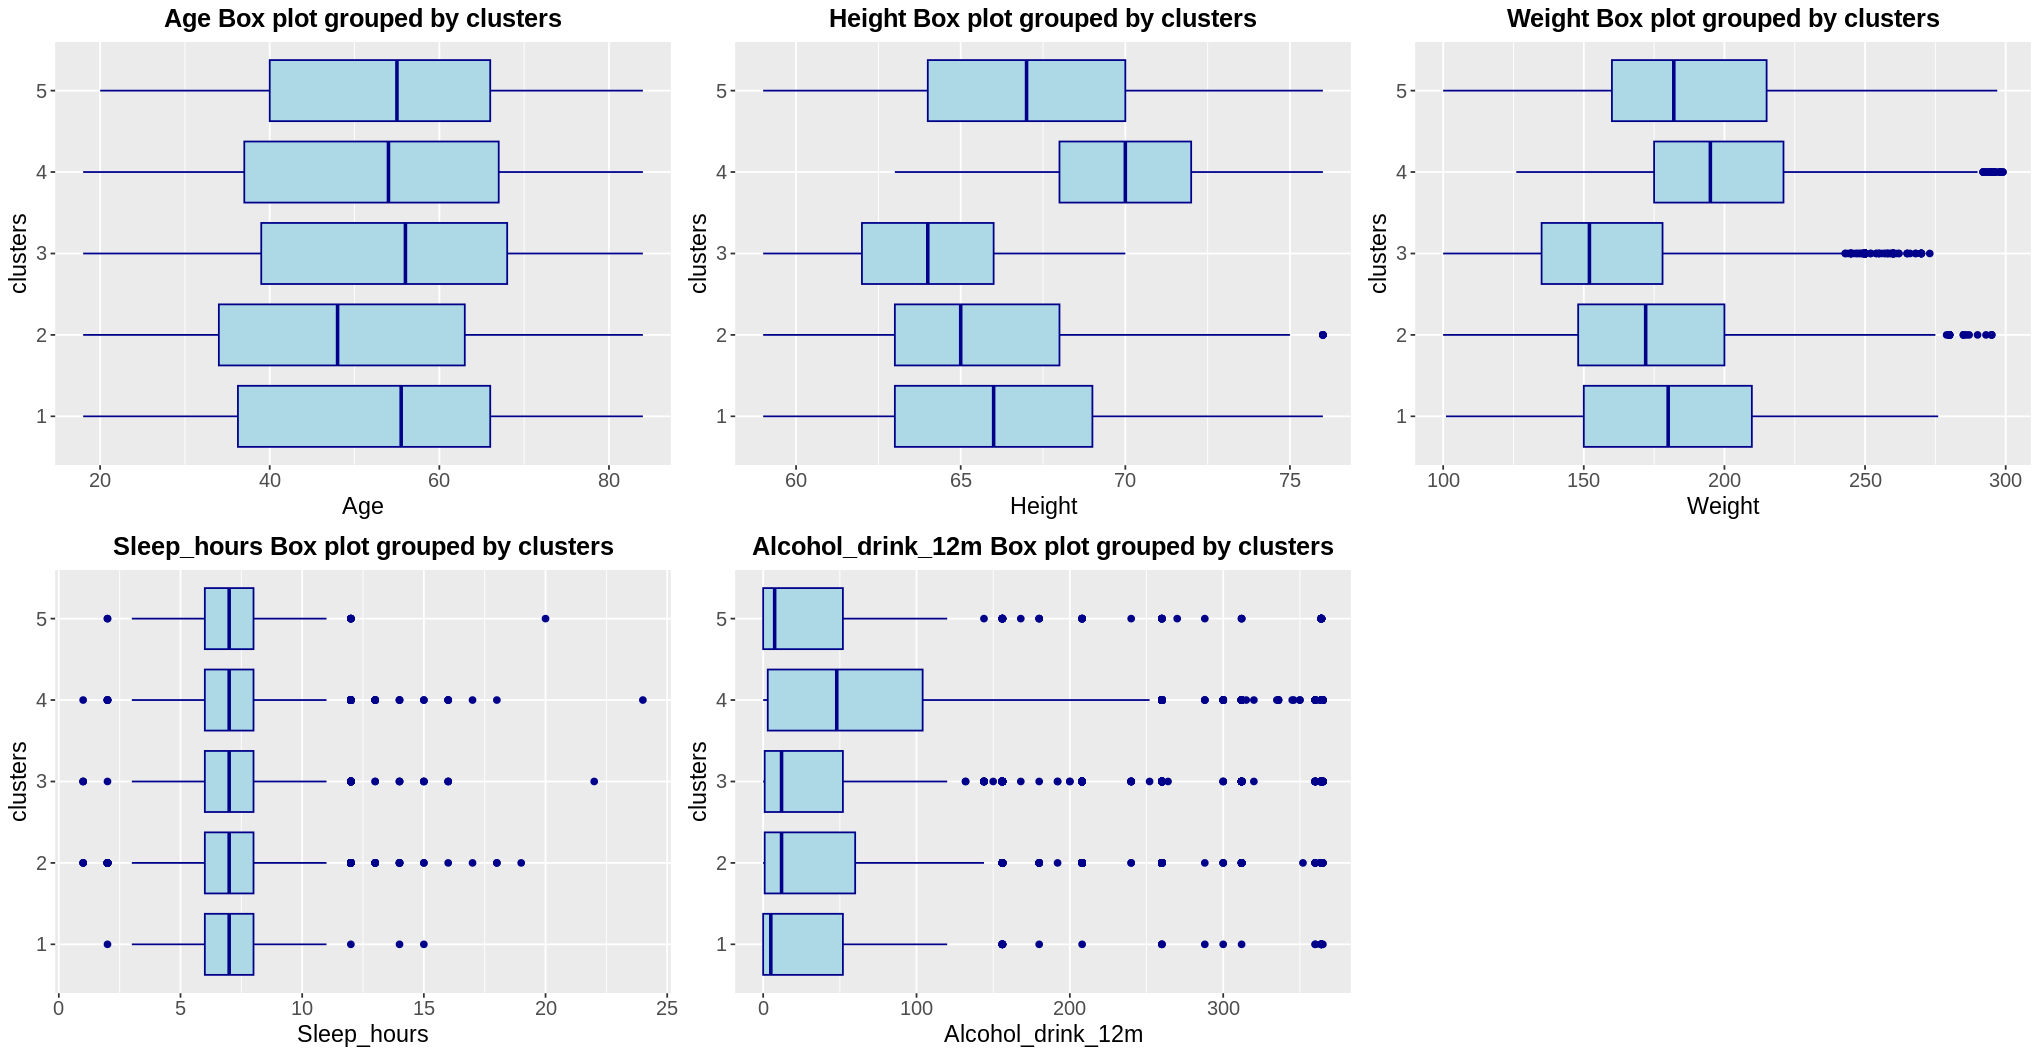

In [245]:
# Changing the size of the plot
options(repr.plot.width = 17, repr.plot.height = 8.8)

# Function to create boxplot for each numeric column grouped by clusters.
plot_boxplot <- function(data, col_name) {
  ggplot(df, aes(x = .data[[col_name]], y = .data[['clusters']])) +

    # Add boxplot with custom colors
    geom_boxplot(fill = "lightblue", color = "darkblue") +
    # Add title and x-axis label
    labs(title = paste0(col_name, ' Box plot grouped by clusters'), x = col_name) +
    # Adjusting the text apperance.
    theme(axis.text.x = element_text(size=12),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
      plot.title = element_text(size=15.2, hjust = 0.5, face='bold'),
      plot.subtitle = element_text(size=14, hjust=0.5))
}

# Create a list of boxplots for each numeric column
plots <- lapply(names(df[, num_cols]), function(col_name) {
  plot_boxplot(df[, num_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)


**Age**
* Cluster 2 has the lowest median age.
* The range is fairly consistent across all clusters.

**Height**
* The IQRs for Clusters 3 and 4 do not overlap, indicating distinct separation. This means the middle 50% of values in Cluster 4 are higher than those in Cluster 3.
* The median height for Cluster 4 is close to the 75th percentile of Cluster 5 and the maximum height of Cluster 3.
* Clusters 1, 2, and 5 have similar and wider ranges compared to Clusters 3 and 4.
* Cluster 3 has a similar minimum to Clusters 1, 2, and 5 but a much lower maximum.
* Cluster 4 has a notably higher minimum, though its maximum is comparable to Clusters 1, 2, and 5.
* Cluster 2 contains at least 1 outlier.

**Weight**
* The median weight for Cluster 4 is above the 75th percentile of Cluster 3.
* The median weight of Cluster 3 is below the 25th percentile of Cluster 5.
* Cluster 4 has a higher minimum weight than any other cluster.
* Clusters 2, 3, and 4 all have outliers.
* Maximum weights in Clusters 1 and 3 are lower than in Clusters 2, 4, and 5.

**Sleep Hours**
* IQRs for all clusters largely overlap, indicating similar sleep patterns.
* All clusters contain outliers.
* Clusters 2, 3, and 4 have lower minimum sleep hours than Clusters 1 and 5.
* Cluster 4 has the widest range, followed by Cluster 3.

**Alcohol_drink_12m**
* Cluster 4 has a much wider IQR than the others, suggesting more variability in alcohol consumption.
* All clusters have outliers.
* Cluster 4 also has the highest threshold for determining outliers.

## Decision Tree

In [246]:
# Loading in Decision Tree function along with way to see decision tree
library(rpart)
install.packages('rpart.plot')
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The next step in interpreting our clusters is to use a decision tree classifier.

What happens in a decision tree is pretty straightforward. All the data points start at one spot, called the root (or parent) node. From there, the data gets split into branches based on if-then conditions. This keeps happening until we reach what's called leaf nodes—points where the data can't be split any further. At that point, the model makes a prediction based on whichever class shows up the most in that group.

The way the tree decides where to split is based on something called Gini impurity. This just means how mixed up the classes are in a node—if the Gini is 0, that means every data point in the group is from the same class [1]. For each feature and possible split value, the Gini impurity is calculated. The tree picks the feature and threshold that results in the lowest (or purest) Gini after the split.

### Cluster 1

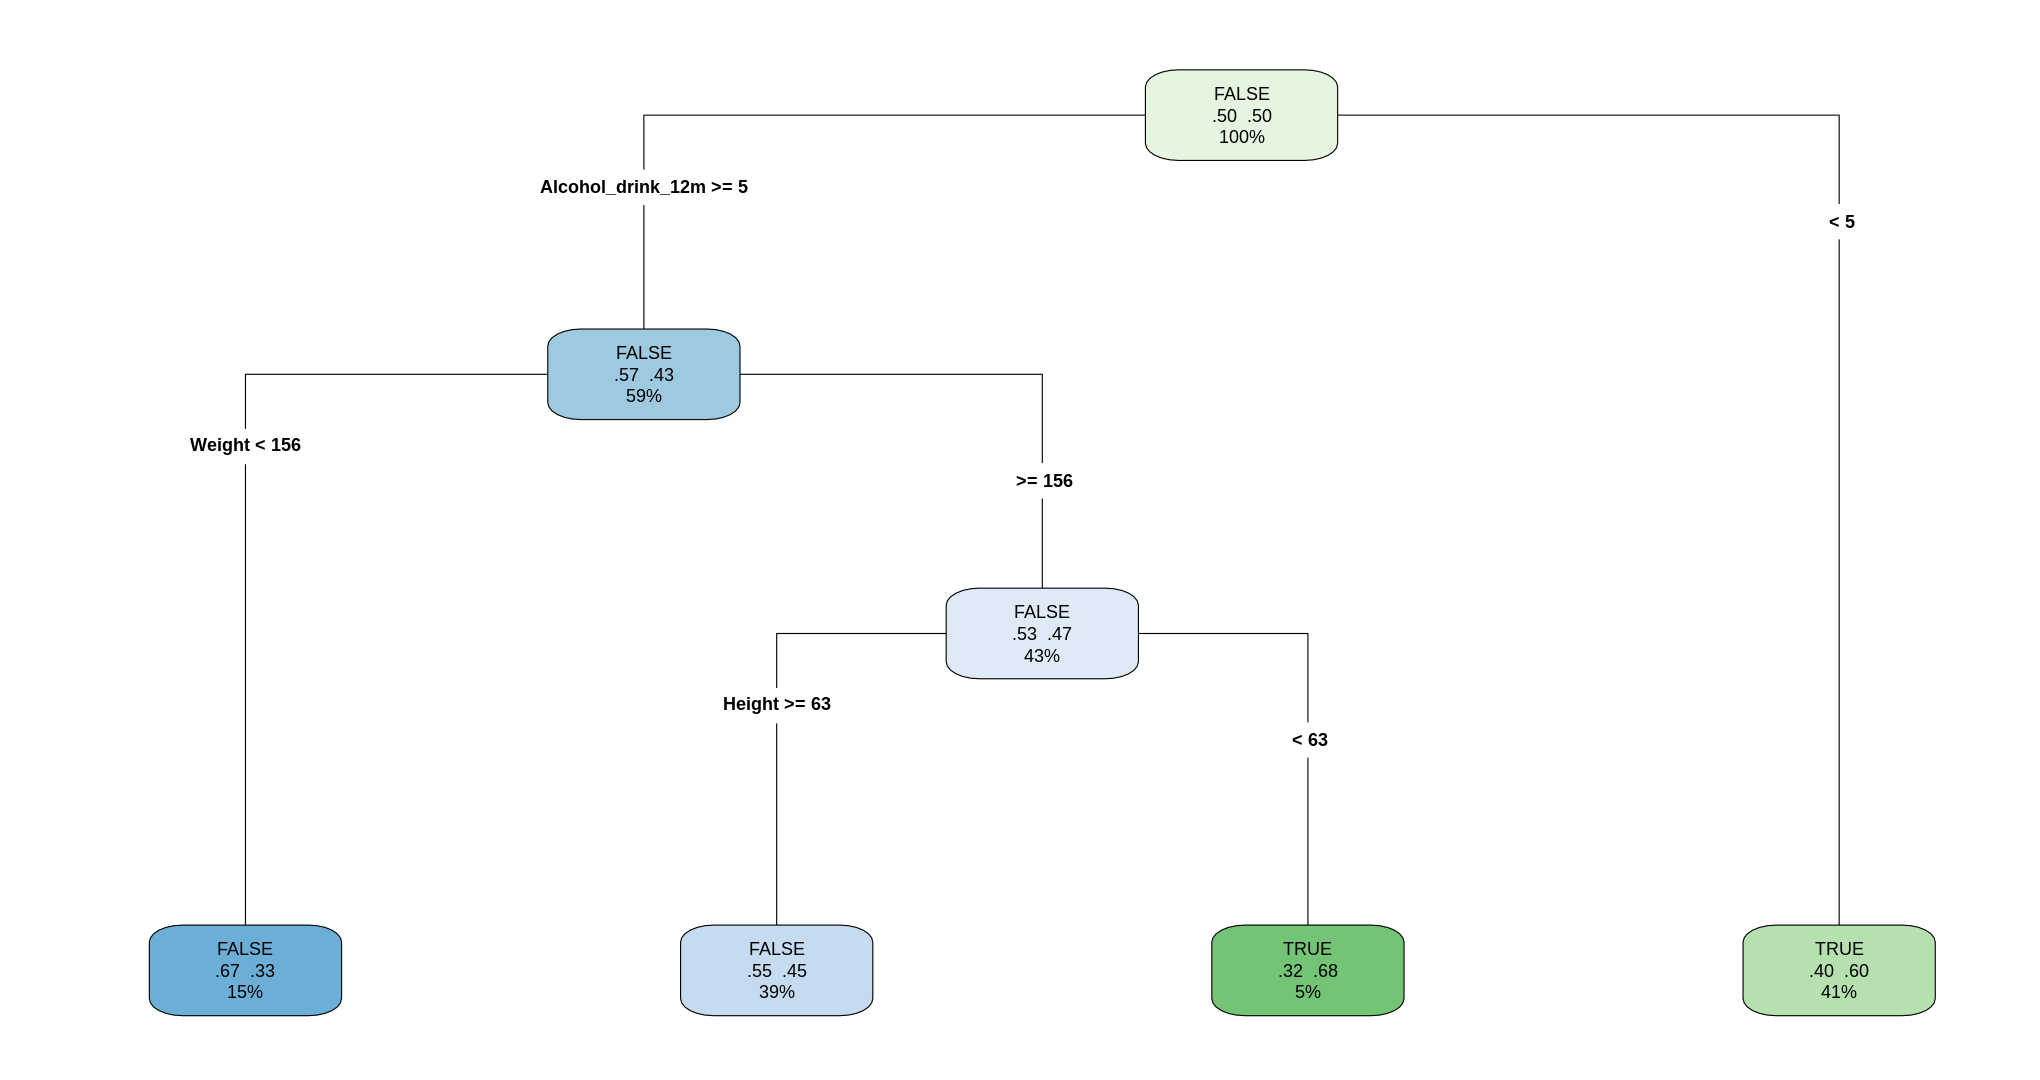

In [247]:
# Creating target variable (TRUE if cluster is 1 and False if not)
target_1 <- df$clusters == 1
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
# Assign higher weights to minority class (Cluster 1) so model pays more attention to it
w <- ifelse(target_1,
            1 / sum(target_1),
            1 / sum(!target_1))

# Fitting a decision tree
# Classifying target_1 based on all numerical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_1 ~ .,
            data = df[, c(num_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9, repr.plot.background = "white")
rpart.plot(dt, type=4, extra=104, cex=.9)

The reason the root node shows a 50/50 split between the TRUE and FALSE classes is because we applied class weights. This was necessary due to the severe class imbalance—Cluster 1 comprises only about 1.4% of the data. By weighting the minority class more heavily, we ensured the model wouldn't ignore it and default to predicting the majority class (FALSE).

The decision tree reveals the following patterns associated with Cluster 1 membership:
* Adults who drank alcohol on 5 or more days in the past year and weighed less than 156 pounds are unlikely to belong to Cluster 1.
* Adults who drank alcohol on 5 or more days, weighed 156 pounds or more, and had a height of 63 inches or more are unlikely to belong to Cluster 1.
* Adults who drank alcohol on 5 or more days, weighed 156 pounds or more, and a height of less than 63 inches are likely to belong to Cluster 1.
* Adults who drank alcohol on fewer than 5 days in the past year are likely to belong to Cluster 1.

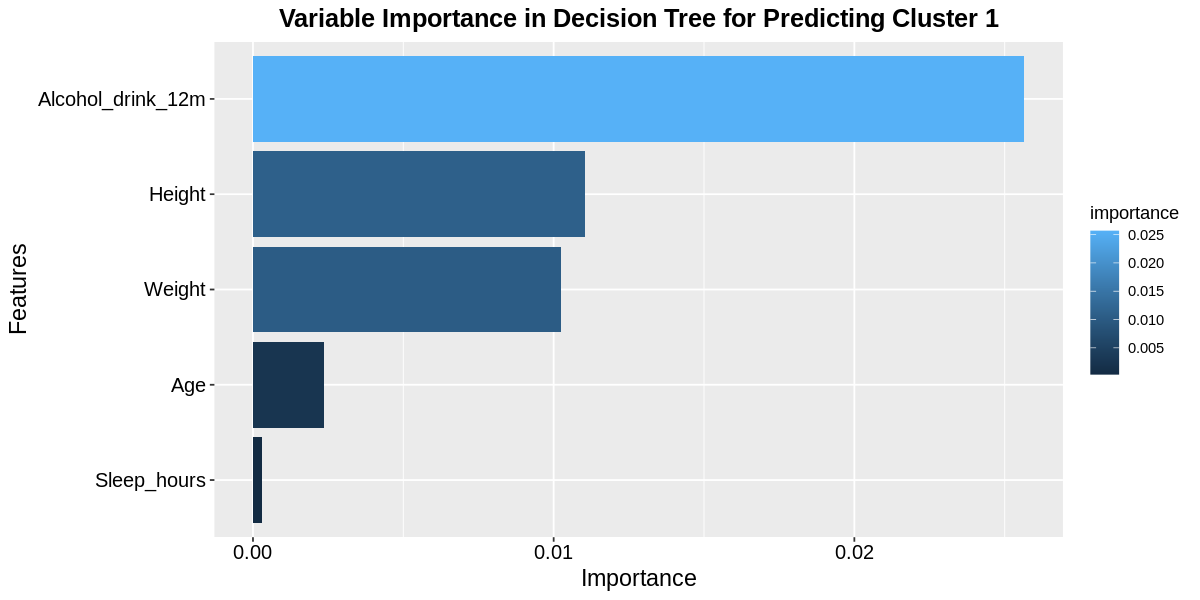

In [248]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for Predicting Cluster 1", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

Variable importance measures how much each predictor contributed to reducing the Gini impurity in the decision tree. In this model, the most important feature was **Alcohol_drink_12m**, followed by **Height**, **Weight**, **Age**, and **Sleep_hours**.

### Cluster 2

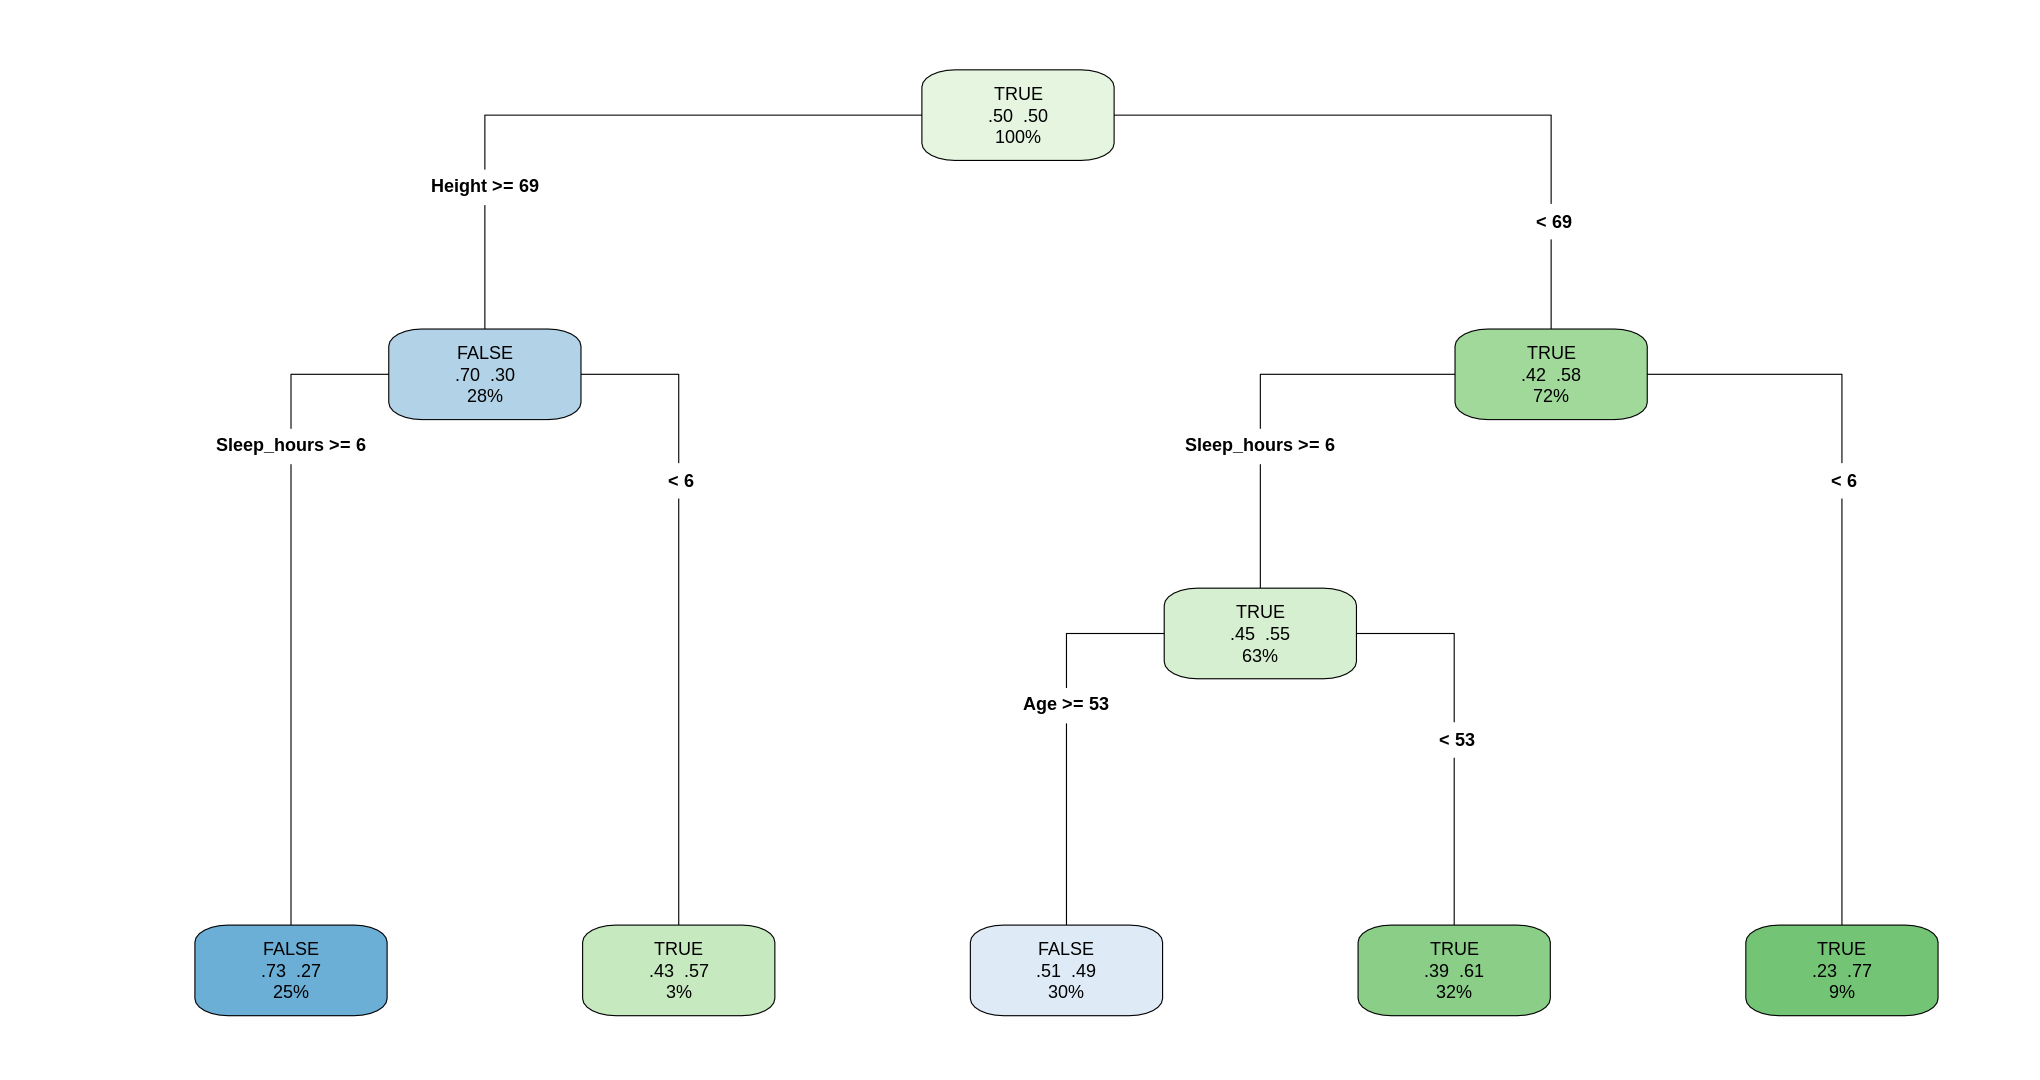

In [249]:
# Creating target variable (TRUE if cluster is 2 and False if not)
target_2 <- df$clusters == 2
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_2,
            1 / sum(target_2),
            1 / sum(!target_2))

# Fitting a decision tree
# Classifying target_2 based on all numerical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_2 ~ .,
            data = df[, c(num_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9, repr.plot.background = "white")
rpart.plot(dt, type=4, extra=104, cex=.9)

The decision tree reveals the following patterns associated with Cluster 2 membership:
* Adults who are 69 inches or taller and sleep 6 or more hours per night are unlikely to belong to Cluster 2.
* Adults who are 69 inches or taller but sleep less than 6 hours per night are likely to belong to Cluster 2.
* Adults who are shorter than 69 inches, sleep 6 or more hours, and are 53 years or older are unlikely to belong to Cluster 2.
* Adults who are shorter than 69 inches, sleep 6 or more hours, and are younger than 53 are likely to belong to Cluster 2.
* Adults who are shorter than 69 inches and sleep less than 6 hours per night are likely to belong to Cluster 2.

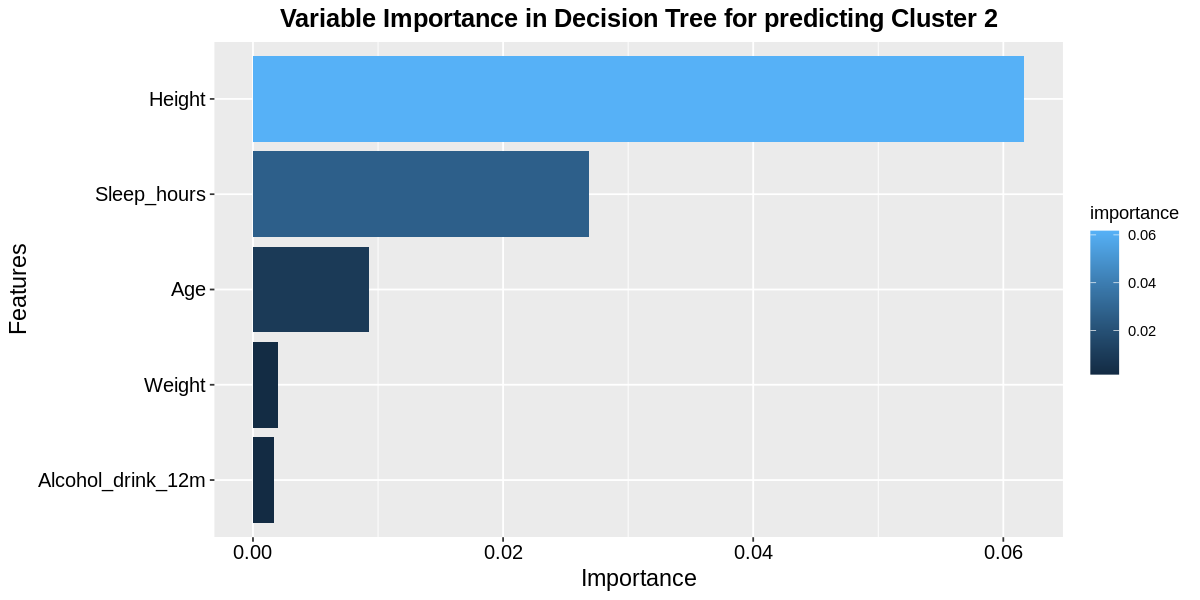

In [250]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for predicting Cluster 2", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the most important feature was **Height**, followed by **Sleep_hours**, **Age**, **Weight**, and **Alcohol_drink_12m**.

### Cluster 3

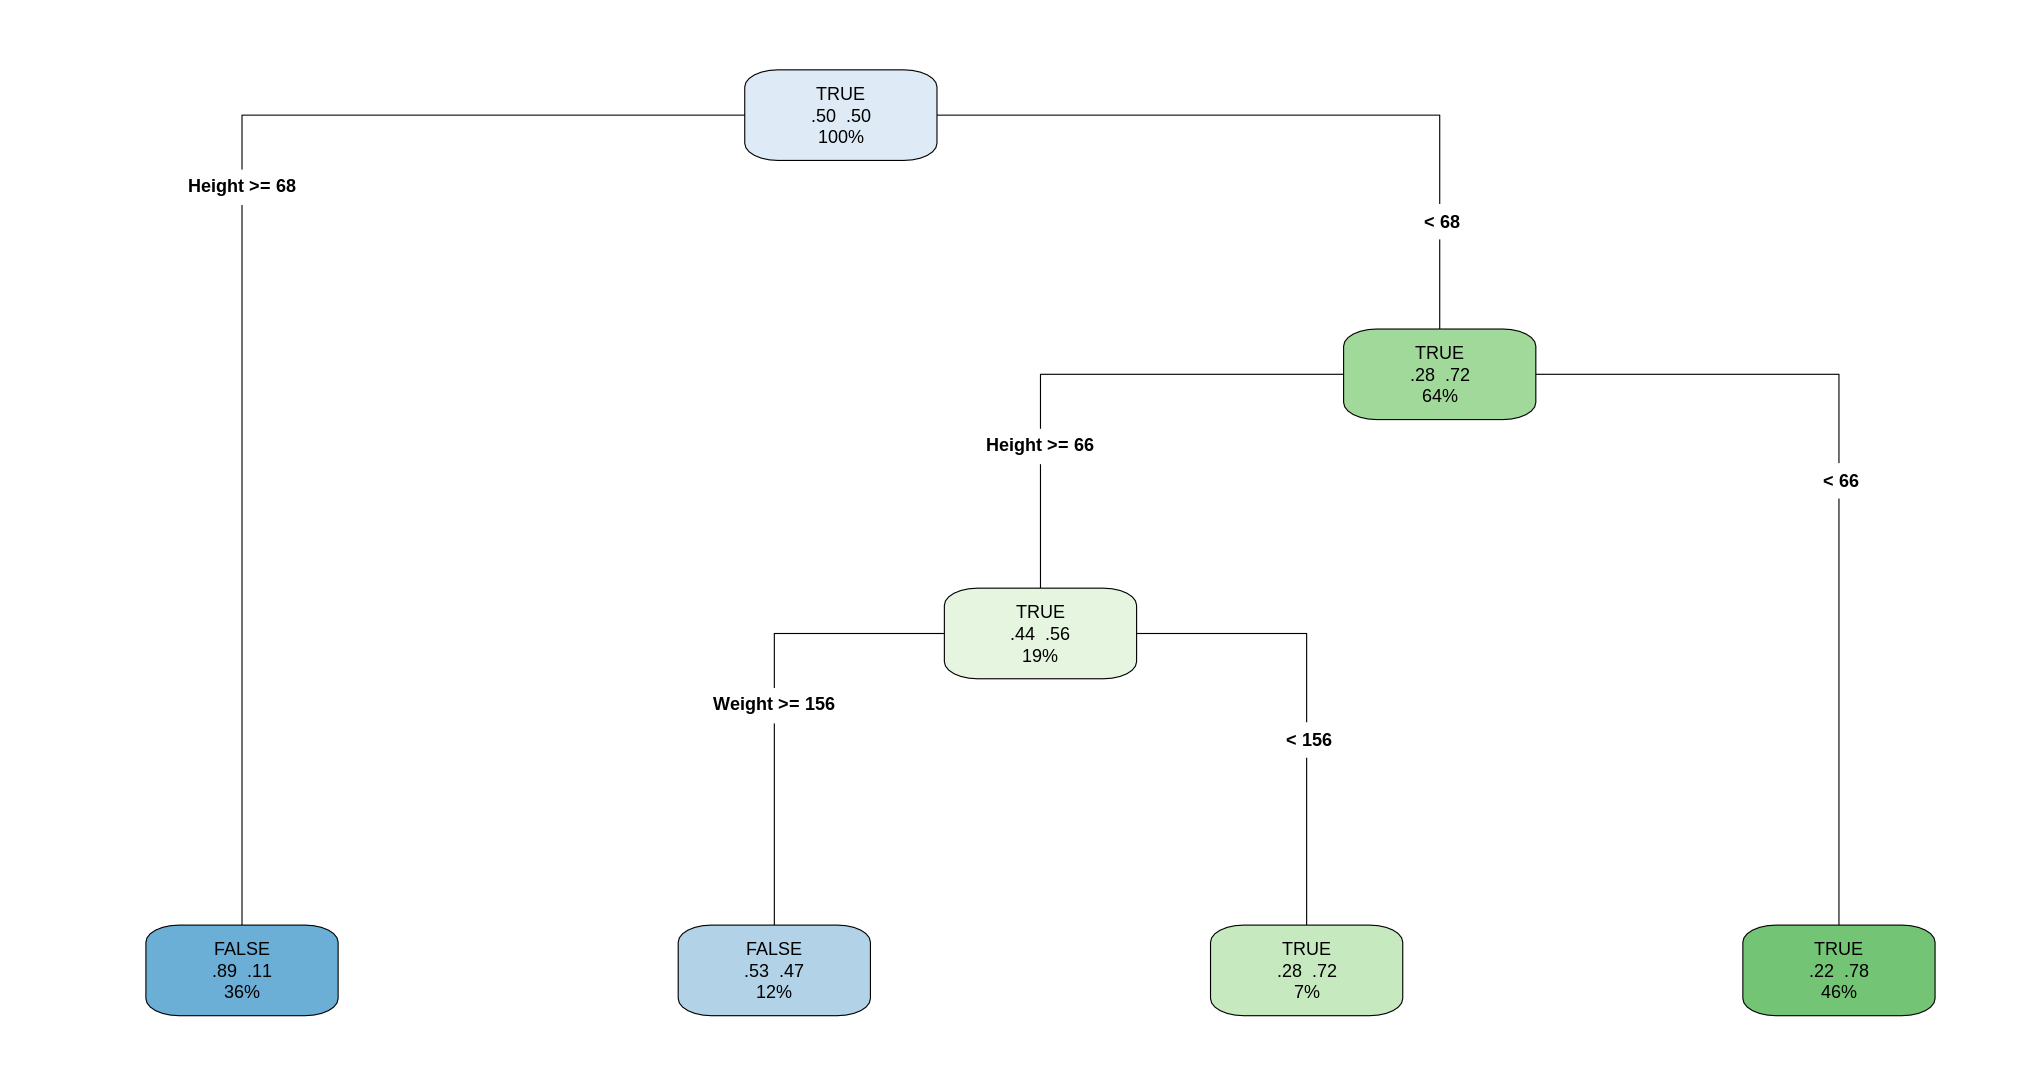

In [251]:
# Creating target variable (TRUE if cluster is 3 and False if not)
target_3 <- df$clusters == 3
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_3,
            1 / sum(target_3),
            1 / sum(!target_3))

# Fitting a decision tree
# Classifying target_3 based on all numerical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_3 ~ .,
            data = df[, c(num_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9, repr.plot.background = "white")
rpart.plot(dt, type=4, extra=104, cex=.9)

The decision tree reveals the following patterns associated with Cluster 3 membership:
* Adults who are 68 inches or taller are unlikely to belong to Cluster 3.
* Adults who are shorter than 68 inches, at least 66 inches tall, and weigh 156 pounds or more are unlikely to belong to Cluster 3.
* Adults who are shorter than 68 inches, at least 66 inches tall, and weigh less than 156 pounds are likely to belong to Cluster 3.
* Adults who are shorter than 66 inches are likely to belong to Cluster 3.

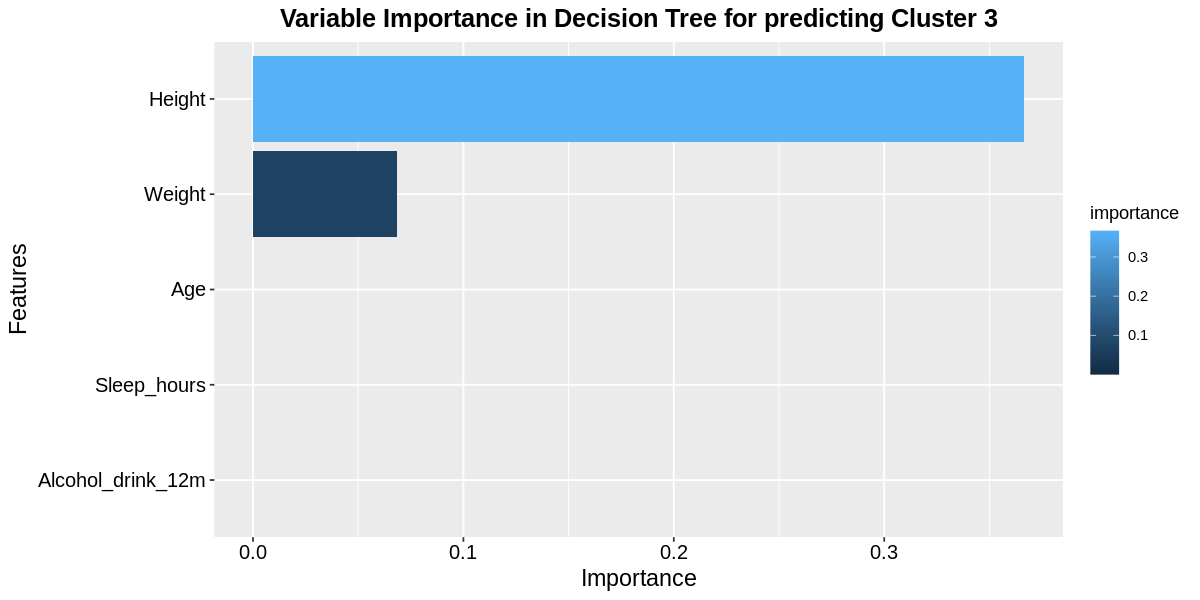

In [252]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for predicting Cluster 3", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the feature with the most importance was **Height**, followed by **Weight**.

**Age**, **Sleep_hours**, and **Alcohol_drink_12m** all had no importance.

### Cluster 4

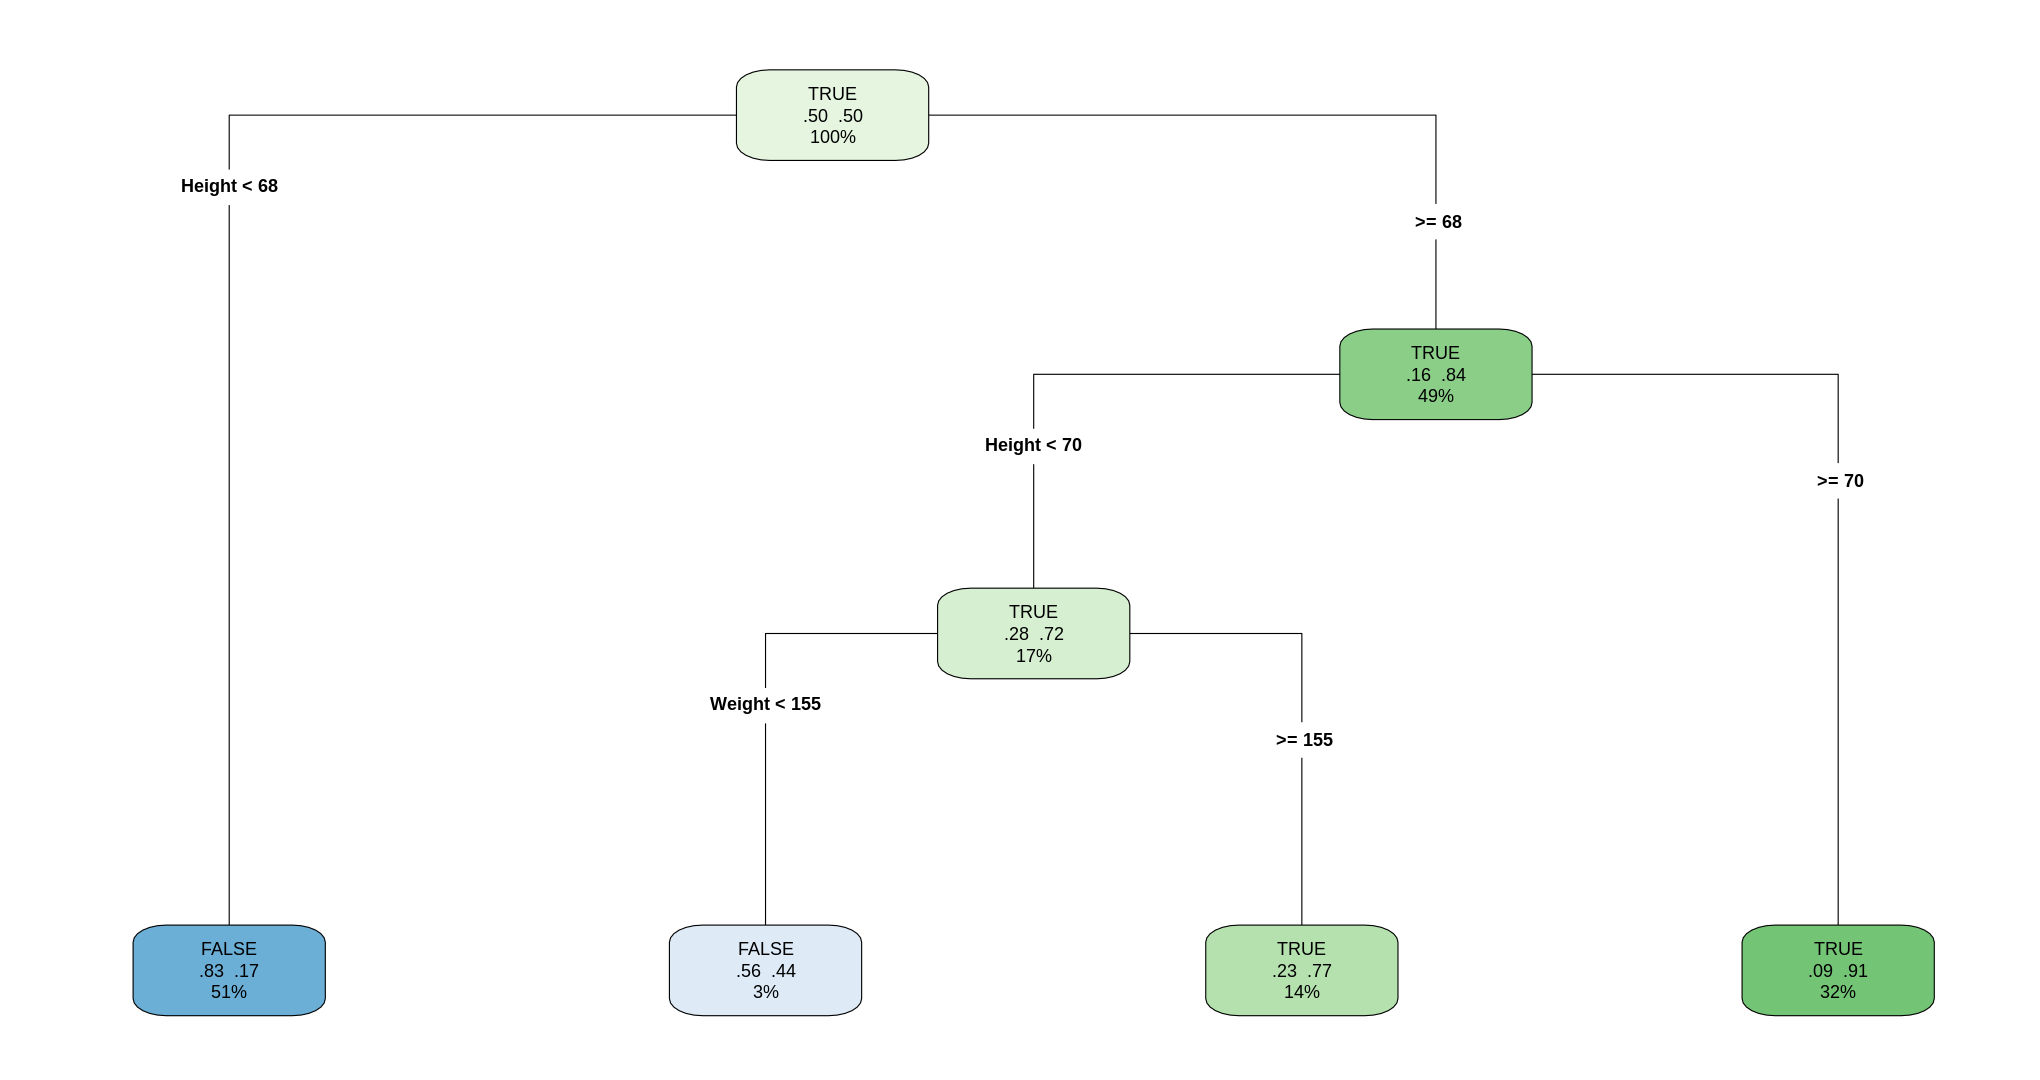

In [253]:
# Creating target variable (TRUE if cluster is 4 and False if not)
target_4 <- df$clusters == 4
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_4,
            1 / sum(target_4),
            1 / sum(!target_4))

# Fitting a decision tree
# Classifying target_4 based on all numerical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_4 ~ .,
            data = df[, c(num_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9, repr.plot.background = "white")
rpart.plot(dt, type=4, extra=104, cex=.9)

The decision tree reveals the following patterns associated with Cluster 4 membership:
* Adults who are shorter than 68 inches are unlikely to belong to Cluster 4.
* Adults who are at least 68 inches, less than 70 inches, and weigh less than 155 pounds are unlikely to belong to Cluster 4.
* Adults who are at least 68 inches, less than 70 inches, and weigh at least 155 pounds are likely to belong to Cluster 4.
* Adults who are 70 inches or taller are likely to belong to Cluster 4.

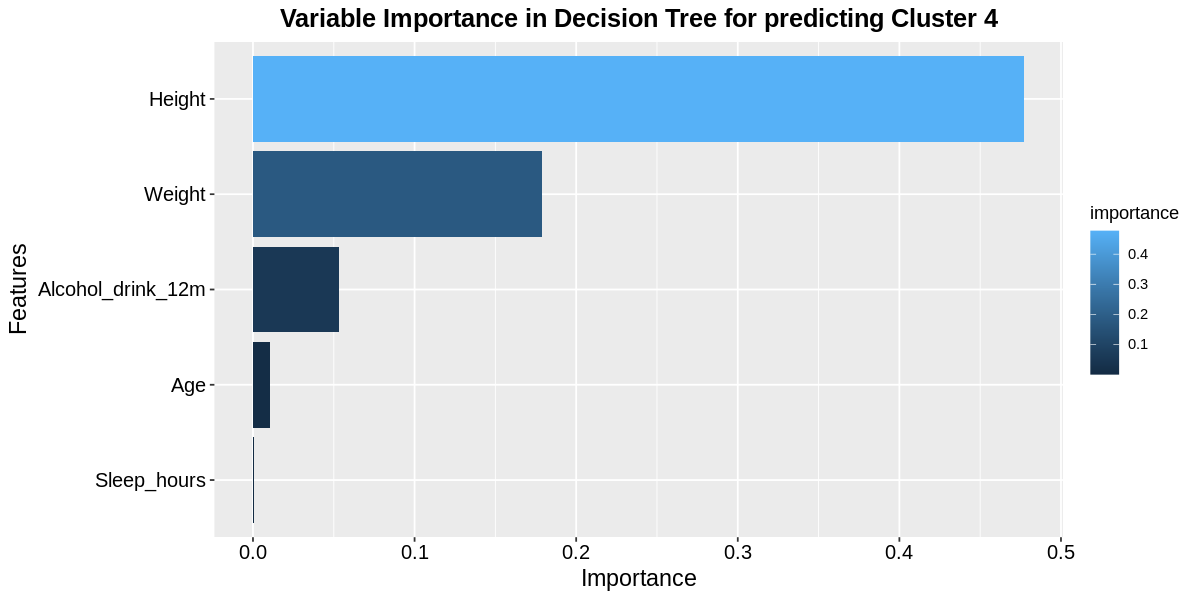

In [254]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for predicting Cluster 4", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In this model, the feature with the most importance was **Height**, followed by **Weight**, **Alcohol_drink_12m**, **Age**, and **Sleep_hours**.

### Cluster 5

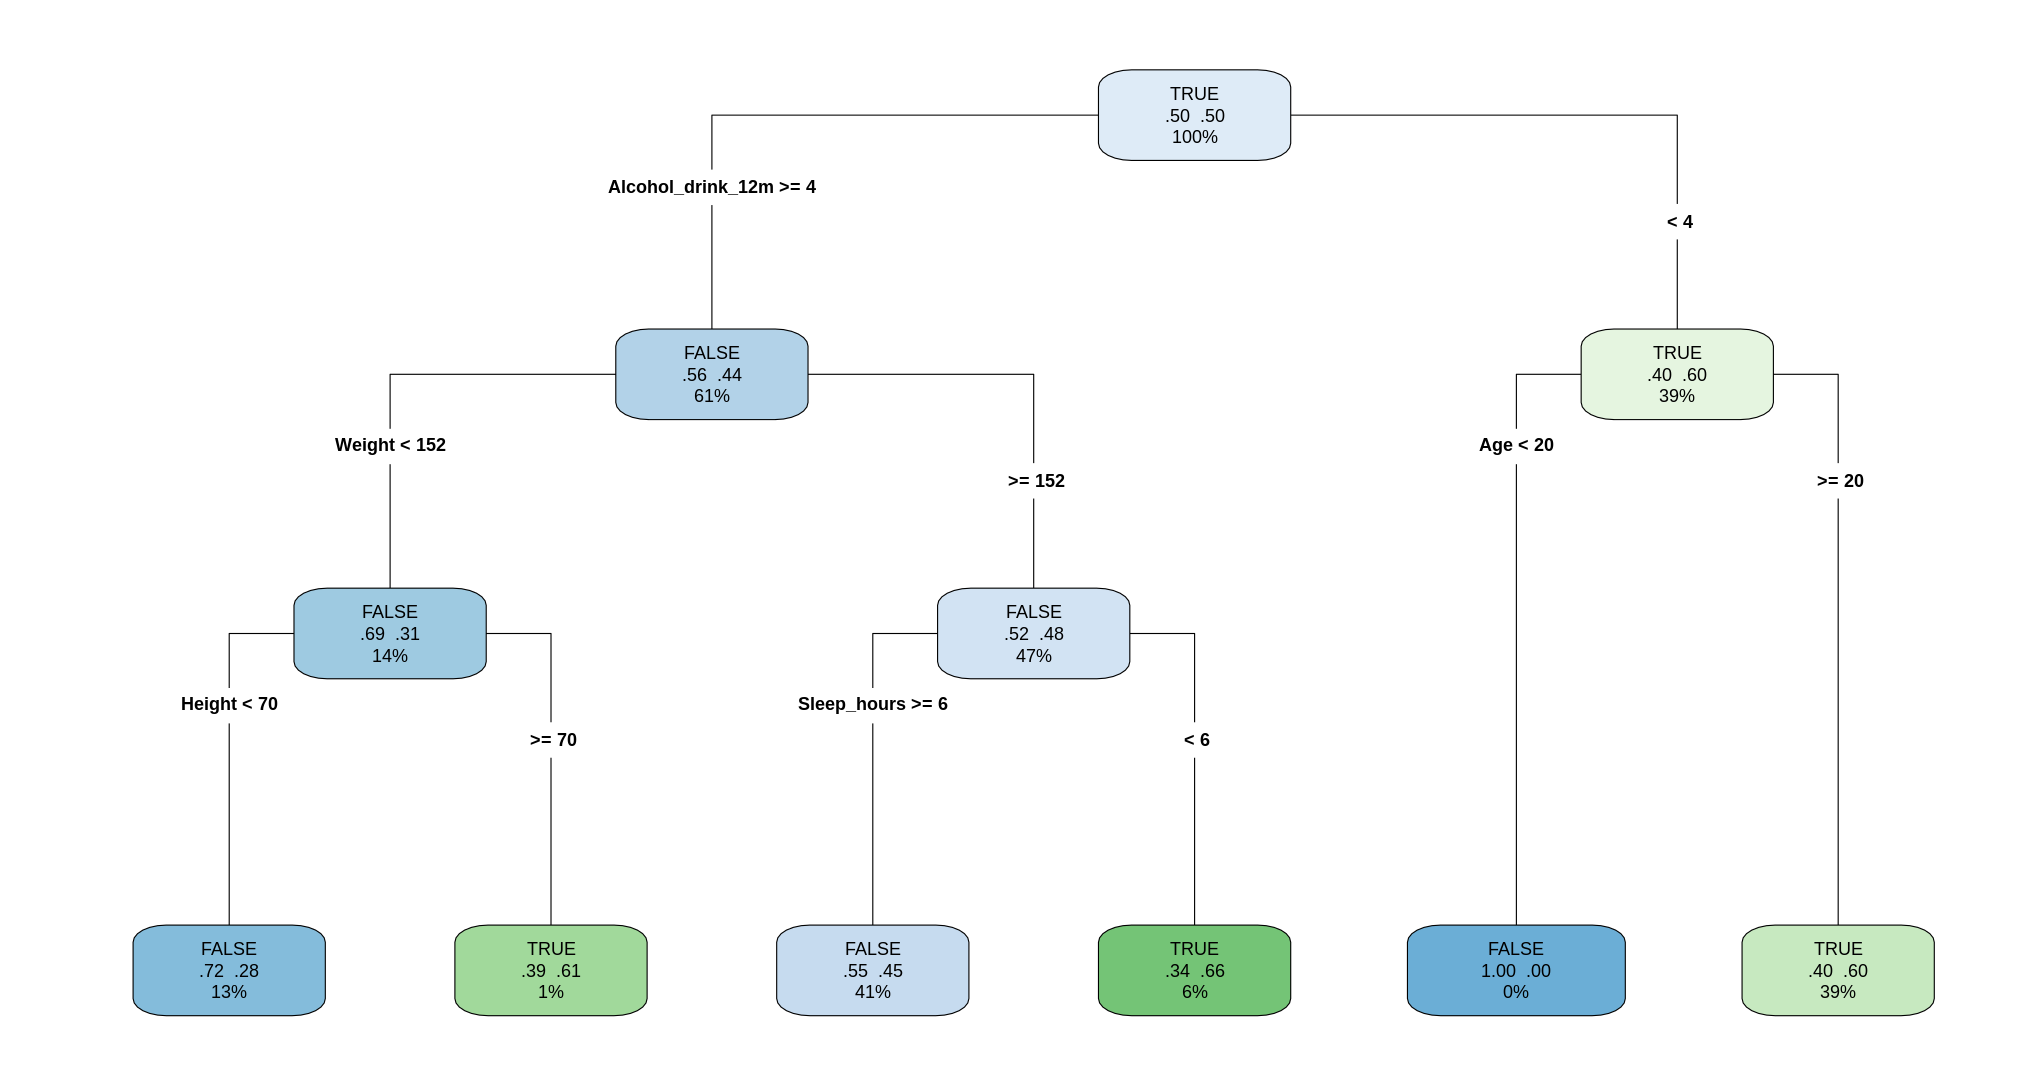

In [255]:
# Creating target variable (TRUE if cluster is 5 and False if not)
target_5 <- df$clusters == 5
# Setting seed for reproducibility
set.seed(123)

# Creating weight vector to handle class imbalance
w <- ifelse(target_5,
            1 / sum(target_5),
            1 / sum(!target_5))

# Fitting a decision tree
# Classifying target_5 based on all numerical columns from df
# weights - used for helping with class imbalance
# method - used to specify this is classification task
# cp - cost complexity paramter of 0.001
# maxdepth - limiting tree depth
dt <- rpart(target_5 ~ .,
            data = df[, c(num_cols)],
            weights = w,
            method = "class",
            cp = 0.001,
            maxdepth = 3)

# Visualizing the tree
par(bg = "white")
options(repr.plot.width=17, repr.plot.height=9, repr.plot.background = "white")
rpart.plot(dt, type=4, extra=104, cex=.9)

The decision tree reveals the following patterns associated with Cluster 5 membership:
* Adults who drank on at least 4 days in the past year, weigh less than 152 pounds, and are shorter than 70 inches are unlikely to belong to Cluster 5.
* Adults who drank on at least 4 days, weigh less than 152 pounds, and are at least 70 inches tall are likely to belong to Cluster 5.
* Adults who drank on at least 4 days, weigh at least 152 pounds, and sleep 6 or more hours per night are unlikely to belong to Cluster 5.
* Adults who drank on at least 4 days, weigh at least 152 pounds, and sleep less than 6 hours per night are likely to belong to Cluster 5.
* Adults who drank on fewer than 4 days in the past year and are younger than 20 years old are unlikely to belong to Cluster 5.
* Adults who drank on fewer than 4 days and are 20 years or older are likely to belong to Cluster 5.

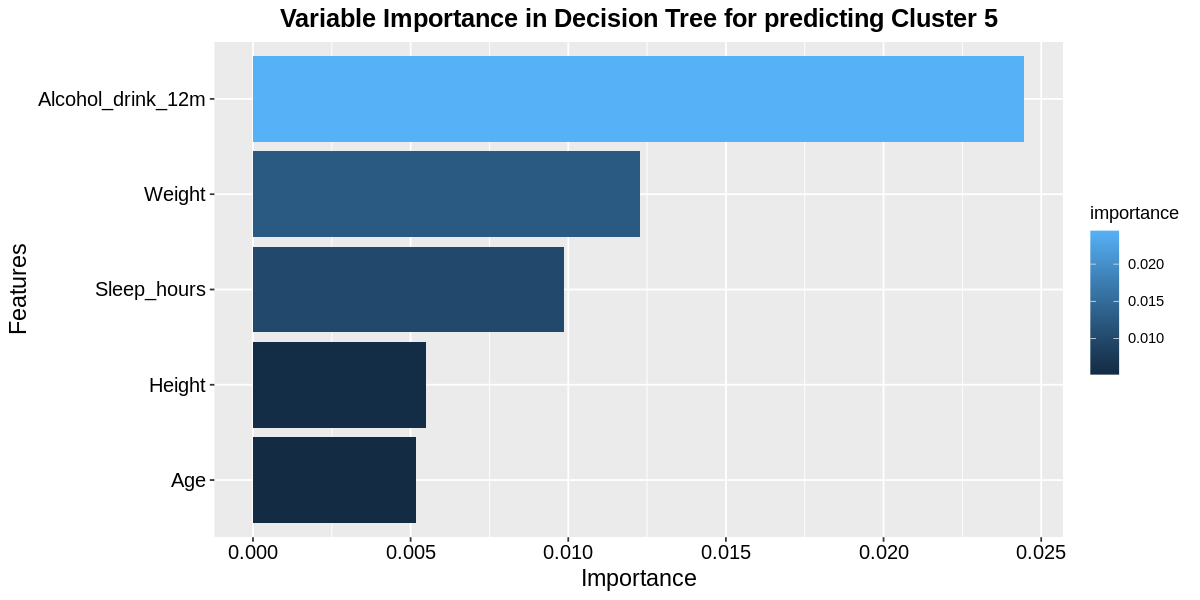

In [256]:
# Creating dataframe with feature names and corresponding importance
var_impt <- dt$variable.importance
var_impt_df <- data.frame(features = names(var_impt),
                          importance = var_impt)

# Change plot dimensions to improve readability
options(repr.plot.width = 10, repr.plot.height = 5)

# Create a horizontal bar plot of variable importance
# - reorder() ensures features with the highest importance appear at the top
# - fill = importance maps bar color to importance values
ggplot(var_impt_df, aes(x = reorder(features, importance), y = importance, fill = importance)) +
  # Create the chart
  geom_col() +
  # Flip the coordinates for a horizontal layout
  coord_flip() +
  # Add custom title and axis labels
  labs(title = "Variable Importance in Decision Tree for predicting Cluster 5", x = "Features", y = "Importance") +
  # Customize text size, color, and alignment
  theme(axis.text.x = element_text(size = 12, color = 'black'),
        axis.text.y = element_text(size = 12, color = 'black'),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 15.2, hjust = 0.5, face = 'bold'))

In the model, the feature with the most importance was **Alcohol_drink_12m**, followed by **Weight**, **Sleep_hours**, **Height**, and **Age**.

### Individual Cluster Summary

* **Alcohol_drink_12m** was the most important feature in the decision trees predicting Cluster 1 and Cluster 5.
* **Height** was the most important feature in the decision trees predicting Cluster 2, Cluster 3, and Cluster 4.
* **Sleep_hours** and **Age** were only showed as splitting features in the decision trees for Cluster 2 and Cluster 5.
* Both Cluster 3 and Cluster 4 used a **Height** of 68 inches as the first split threshold.
* Cluster 3 and Cluster 4 both used **Height** and **Weight** as key features for splitting the data.

## Sources

[1] Géron, A. (2017). Hands-On Machine Learning with Scikit-Learn and TensorFlow: Techniques and Tools to Build Learning Machines. O’Reilly Media.